STUDENTS PERFORMANCE - EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW
------------------------------
Dataset Shape: (1000, 8)
Number of Features: 8
Number of Records: 1000

First 5 rows:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76     

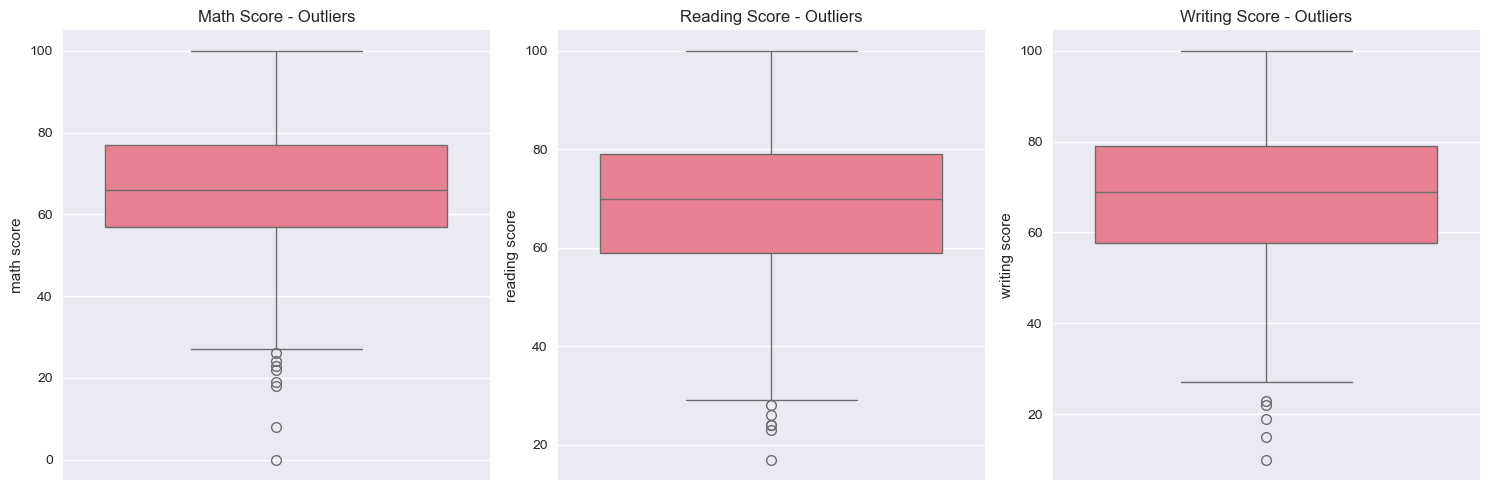


Outlier Treatment (Capping Method):
math score: Outliers capped to bounds [27.00, 107.00]
reading score: Outliers capped to bounds [29.00, 109.00]
writing score: Outliers capped to bounds [25.88, 110.88]

7. DATA VISUALIZATION
------------------------------
Univariate Analysis...


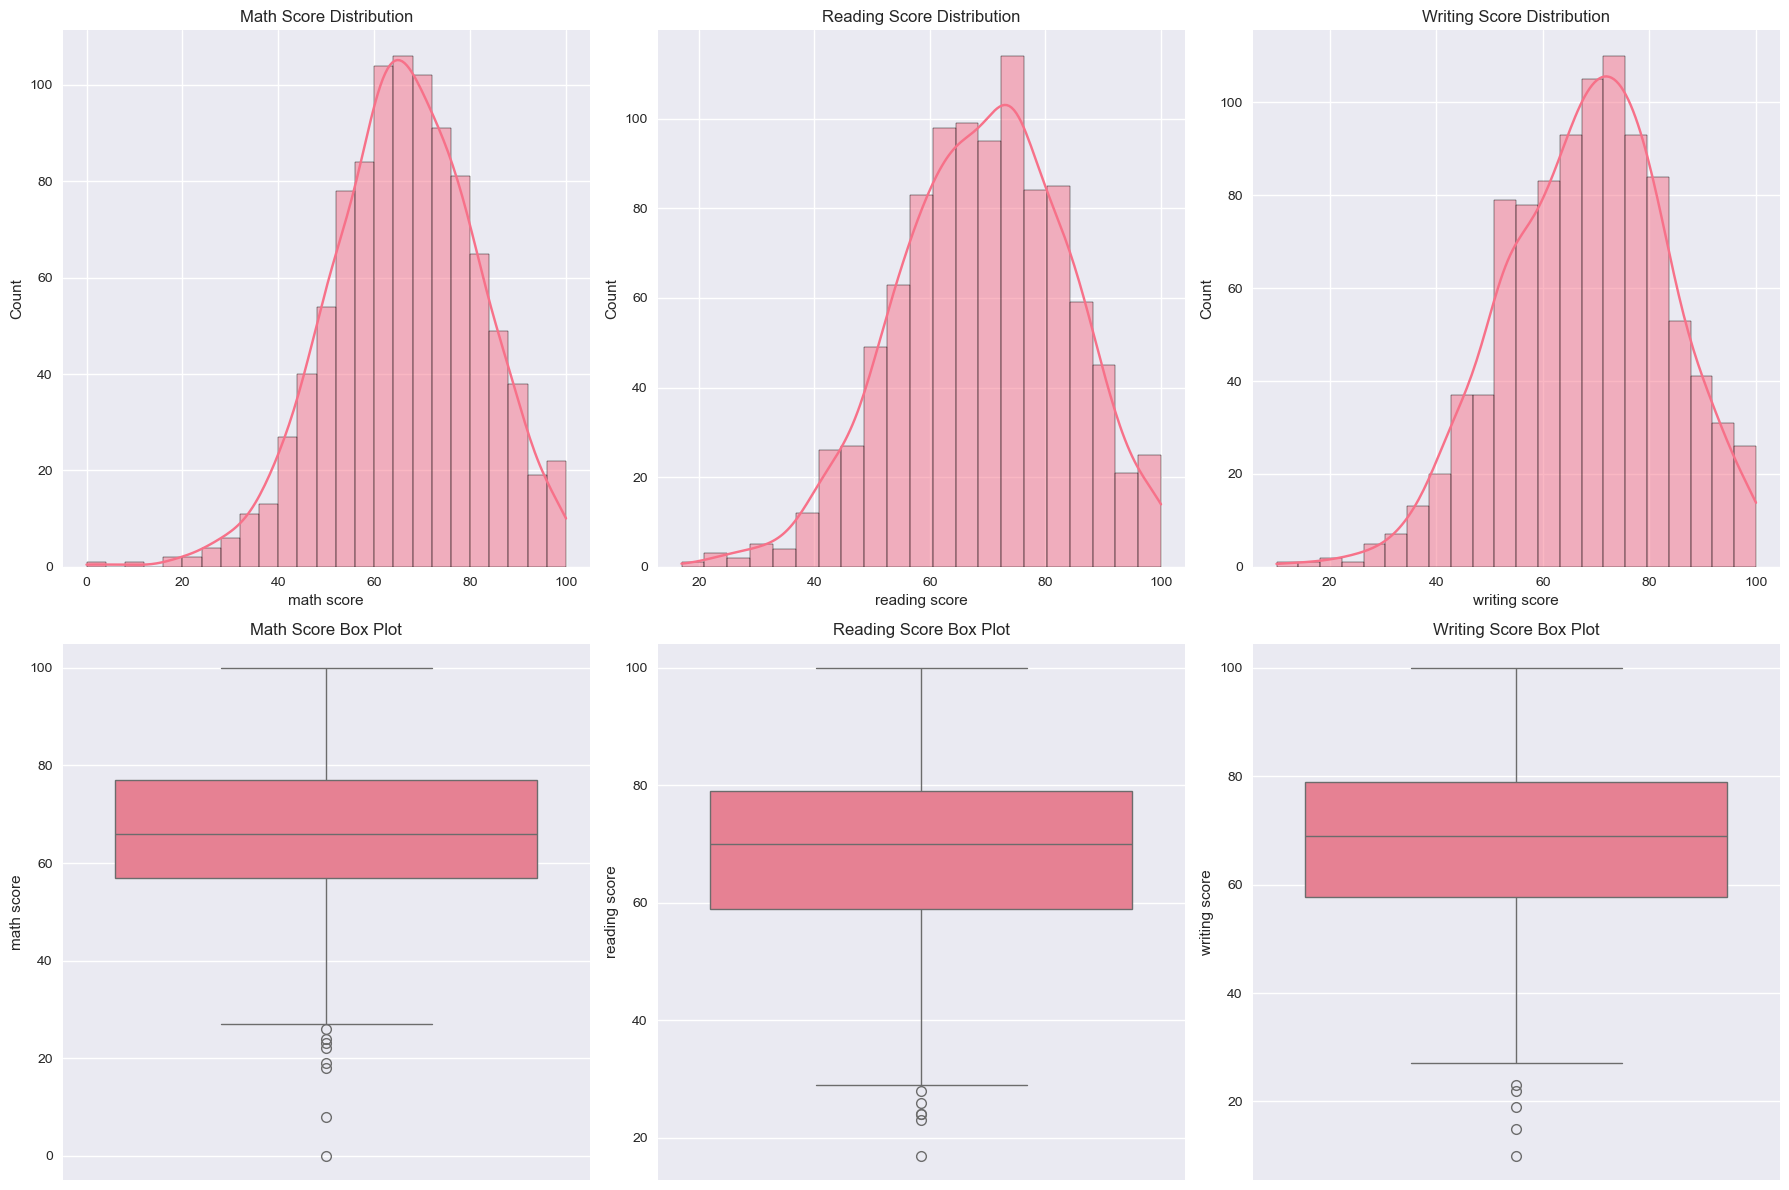

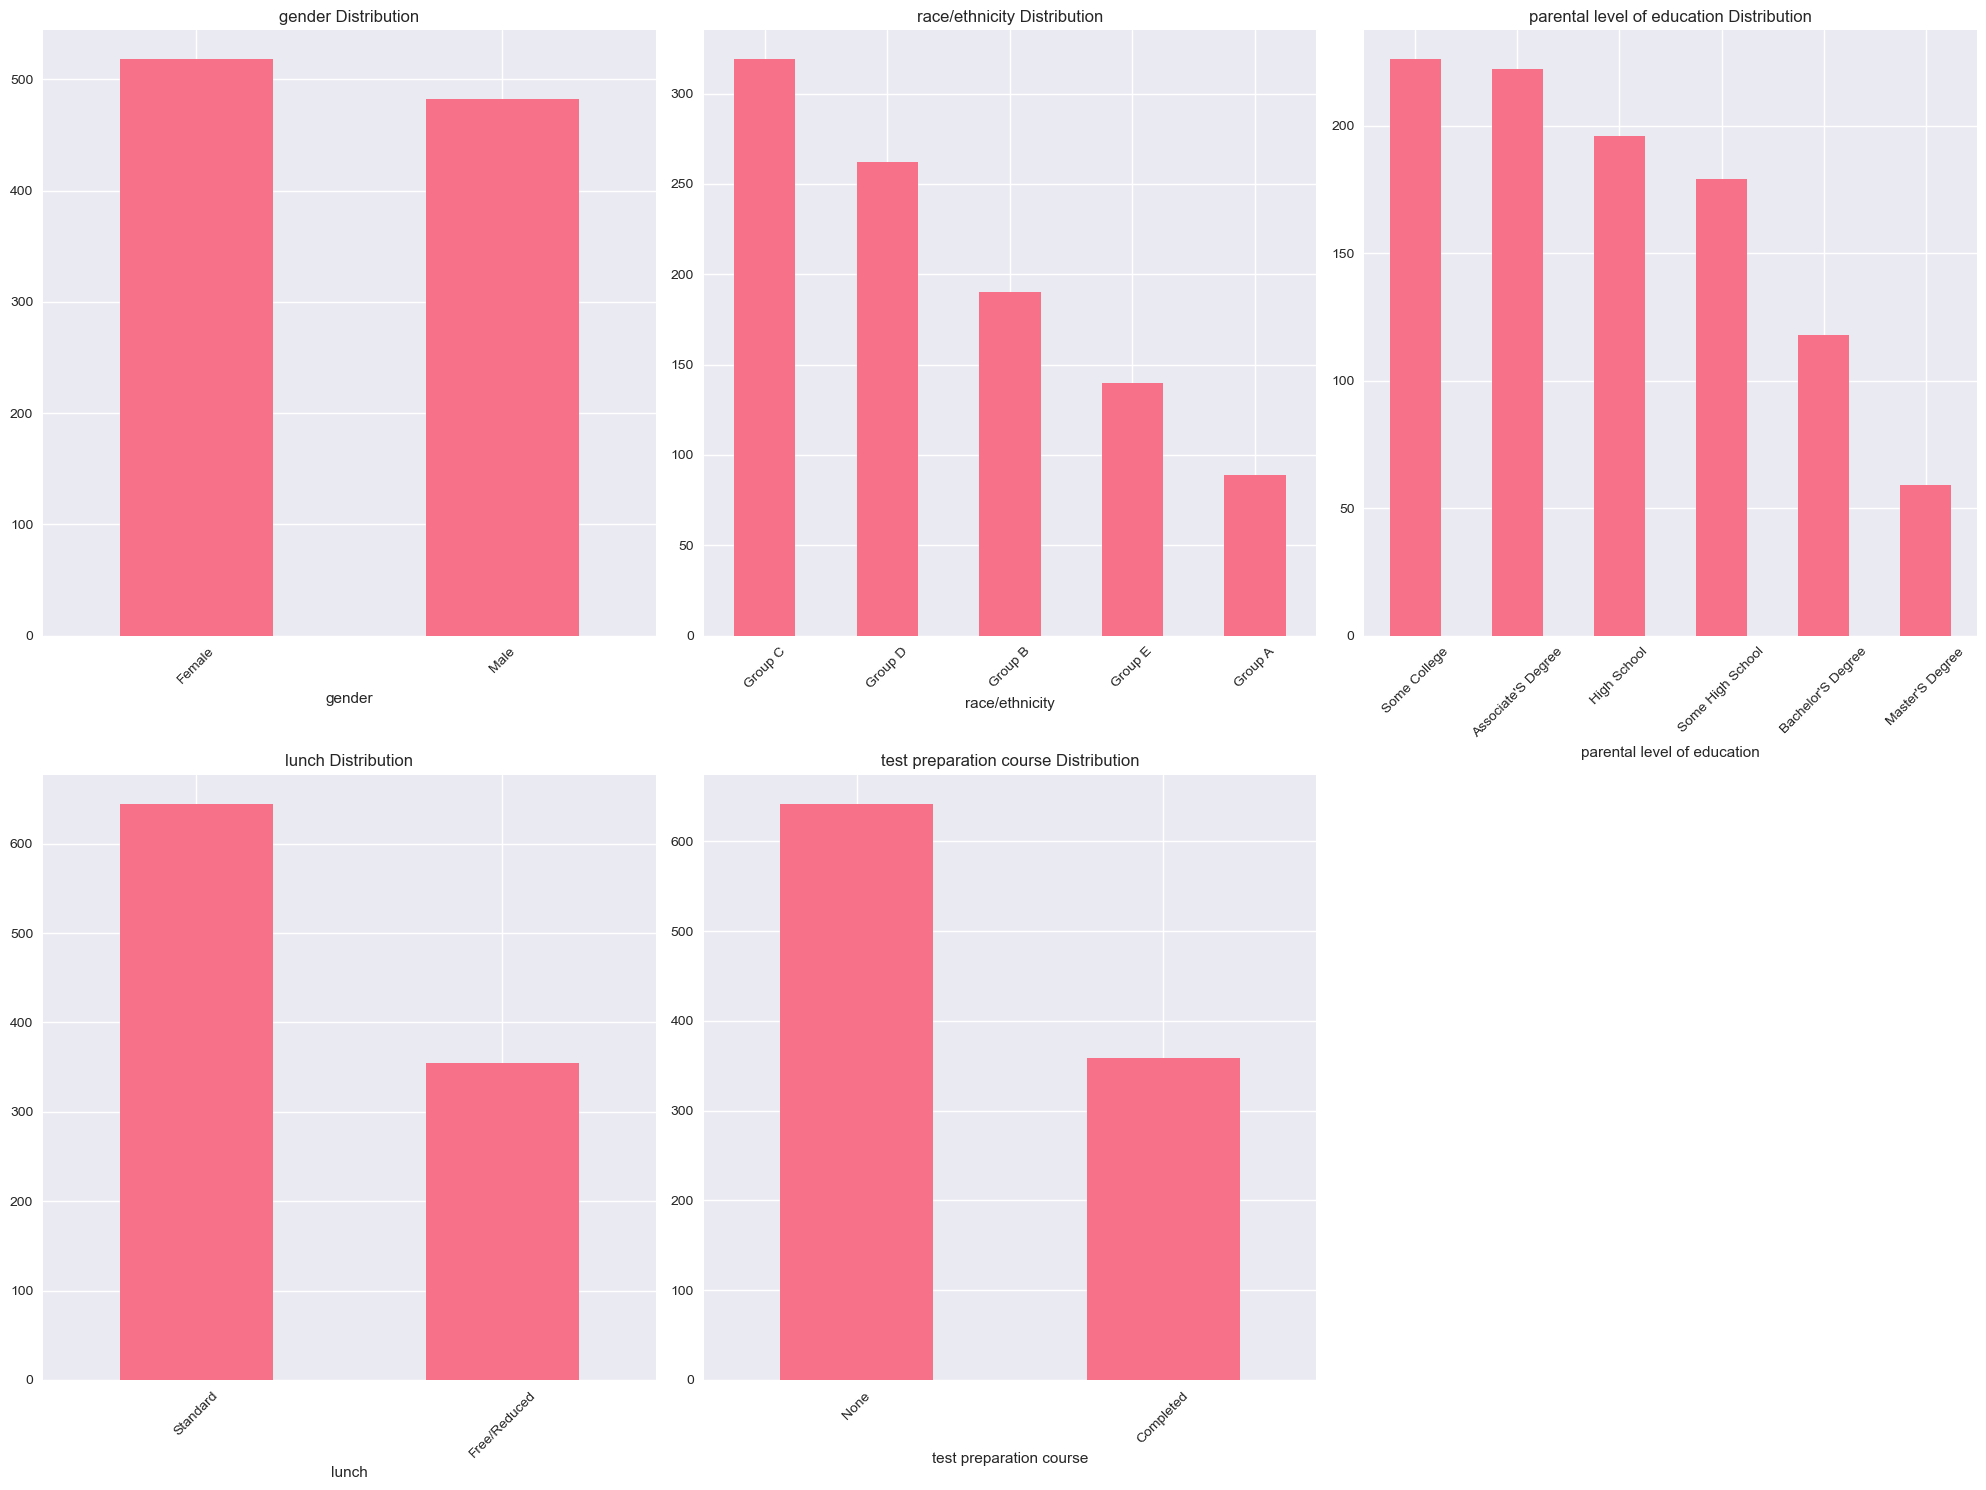

Bivariate Analysis...


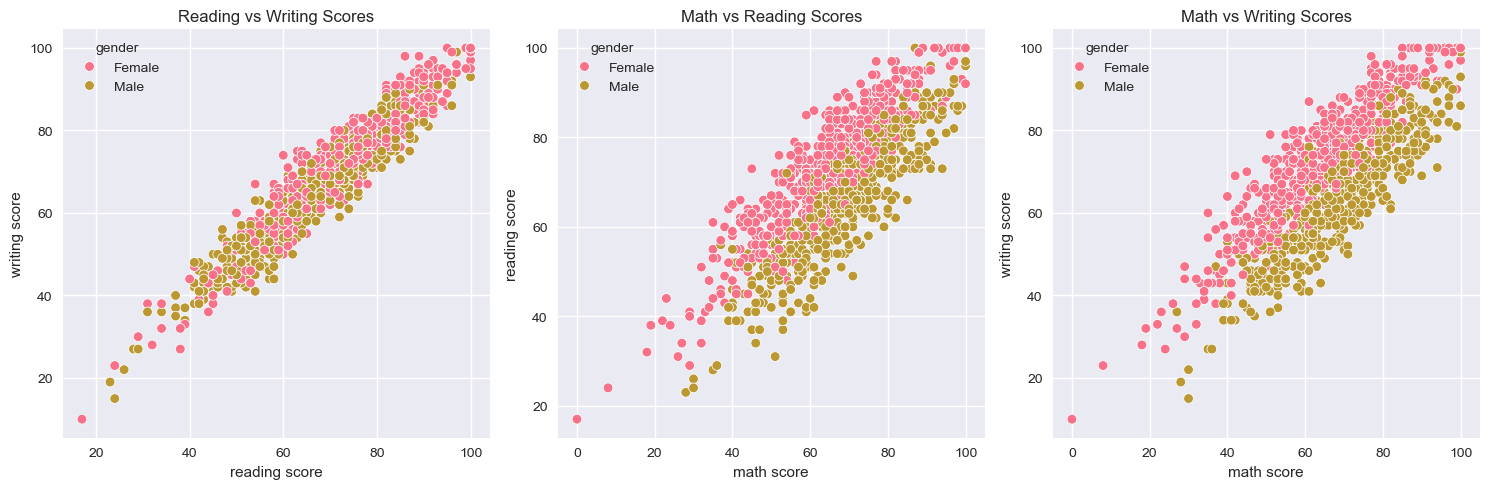

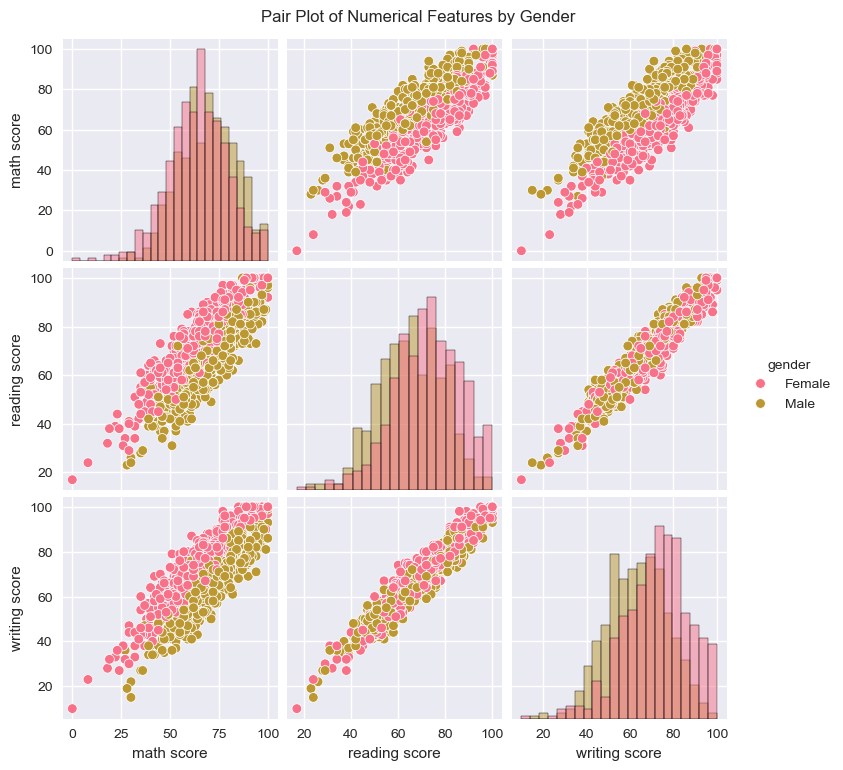

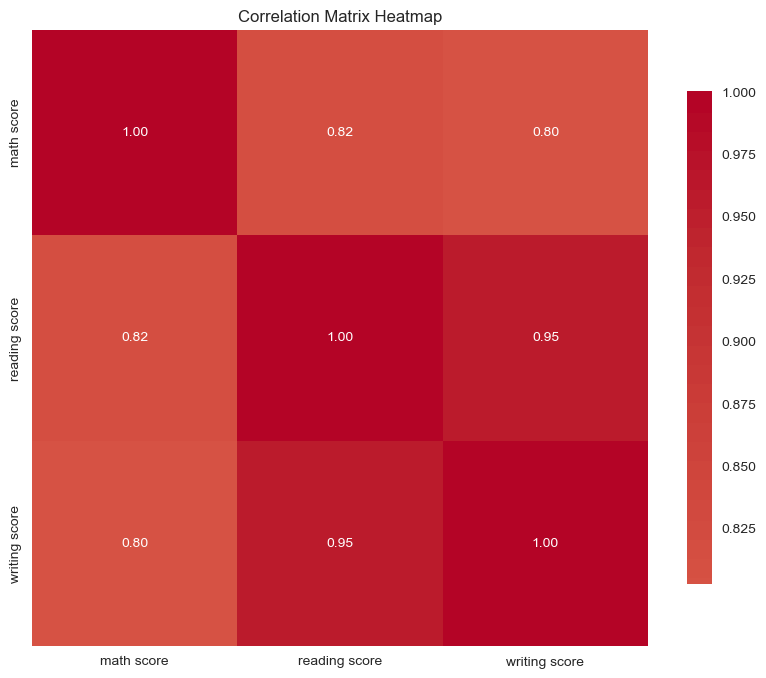

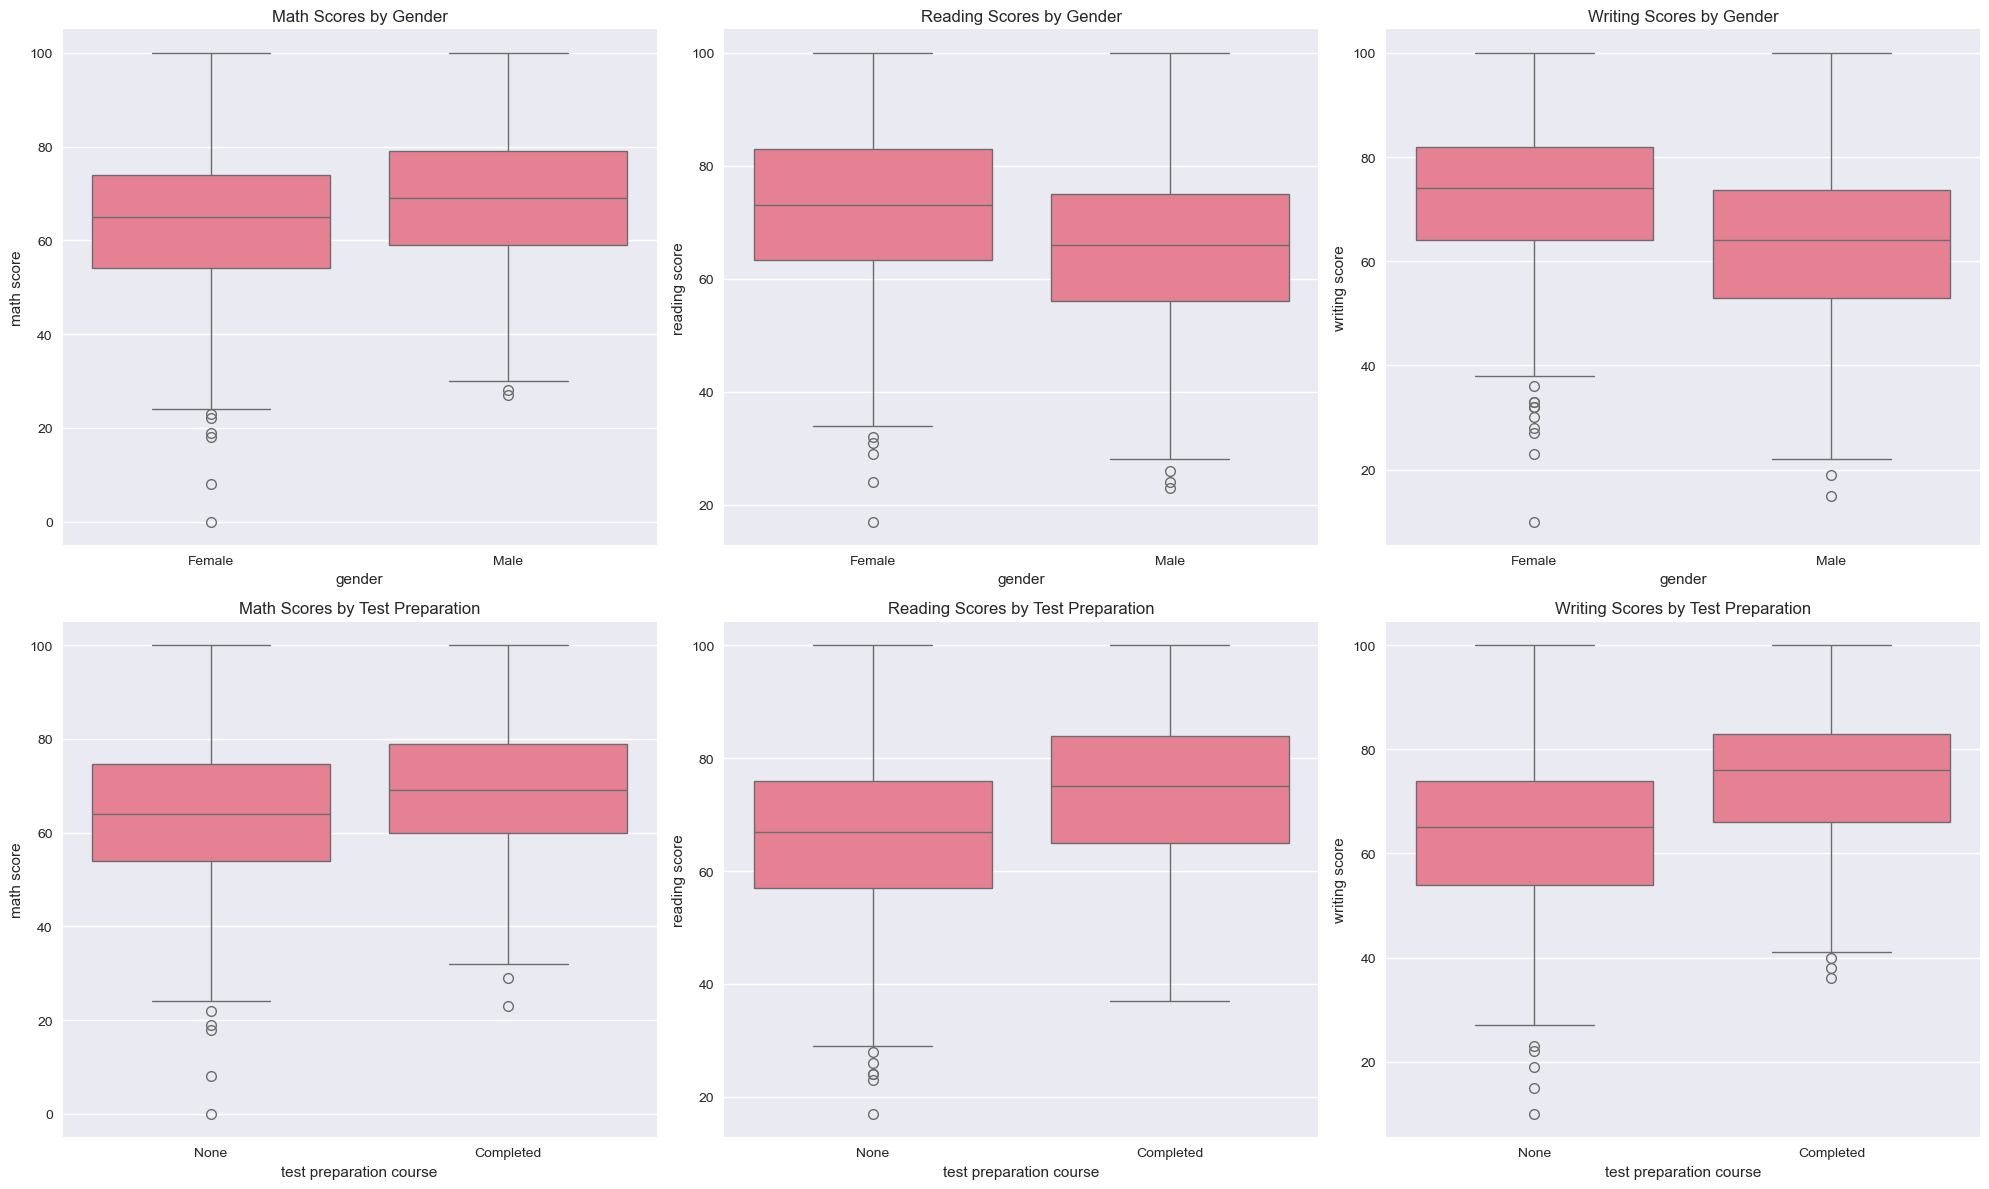


8. MULTIVARIATE ANALYSIS
------------------------------


<Figure size 1200x800 with 0 Axes>

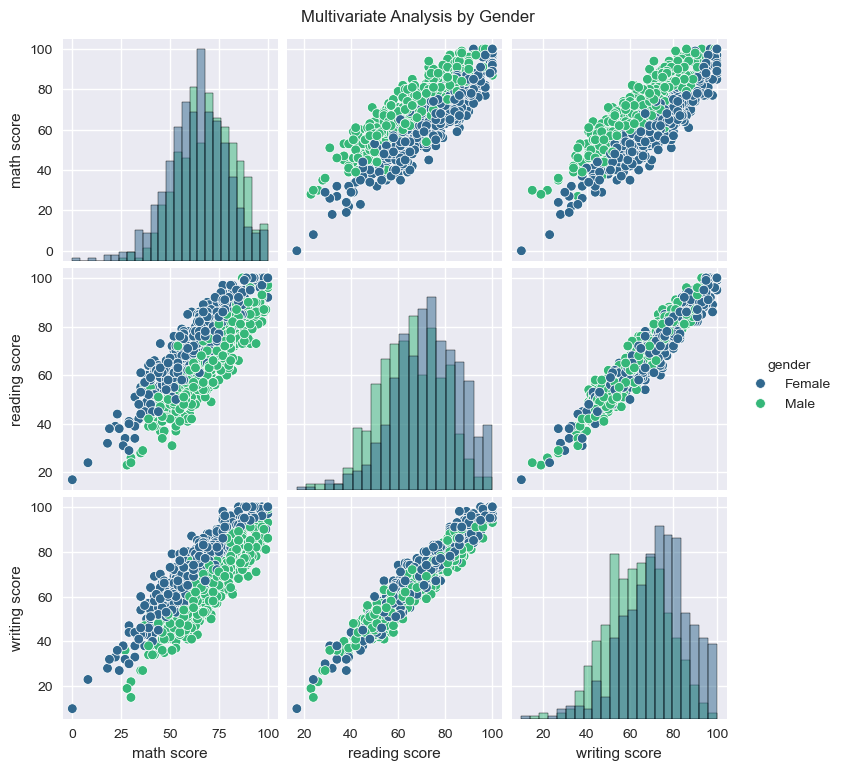

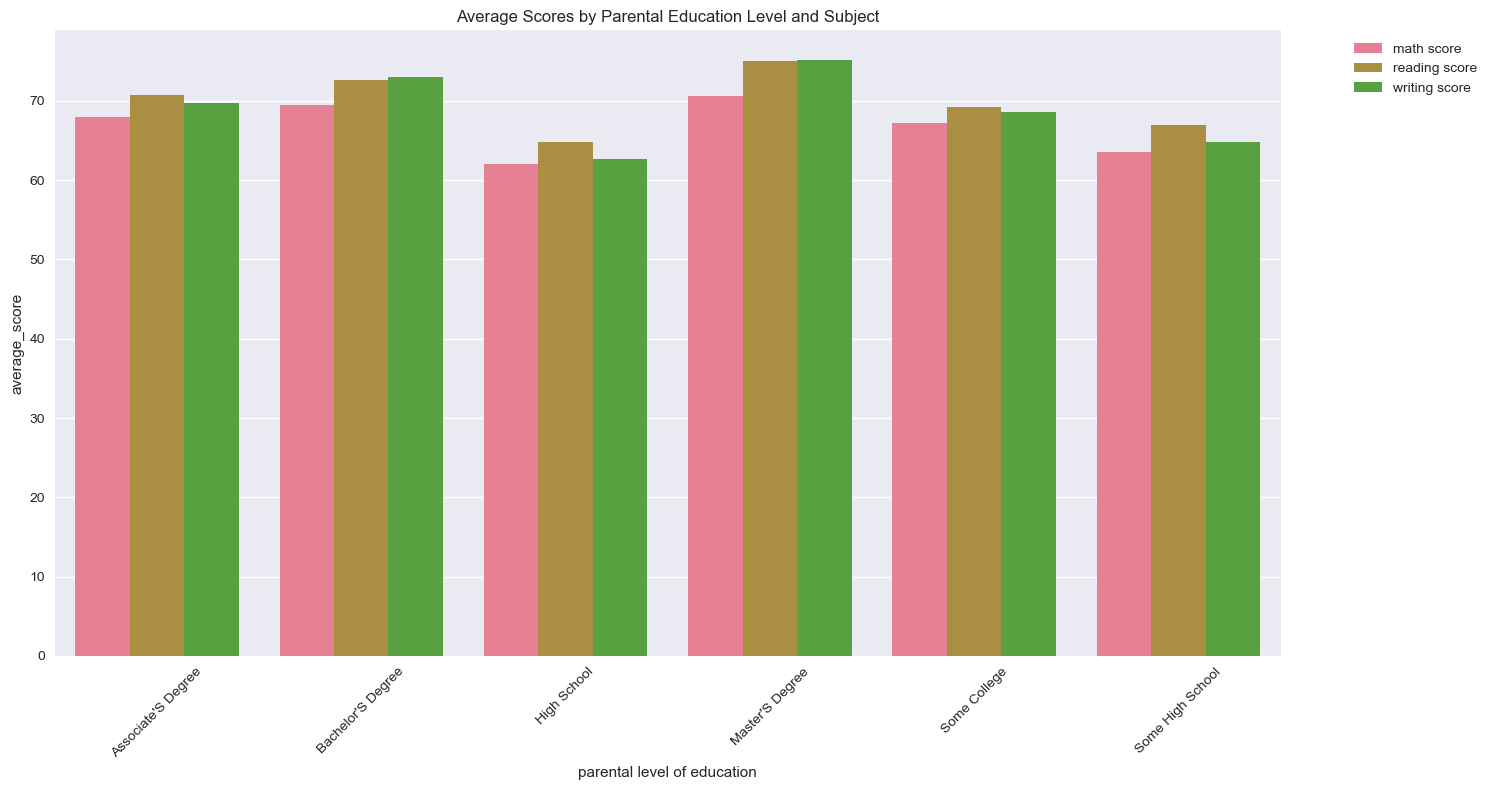


9. INSIGHTS & INTERPRETATION
------------------------------
KEY FINDINGS:
1. Data Quality:
   - No missing values or duplicates found
   - Data is clean and well-structured

2. Score Distributions:
   - All three subjects show approximately normal distributions
   - Math scores show slightly more variability
   - Reading and writing scores are highly correlated

3. Gender Differences:
   - Female students tend to perform better in reading and writing
   - Male students show slightly better performance in math
   Average scores by gender:
        math score  reading score  writing score
gender                                          
Female   63.633205      72.608108      72.467181
Male     68.728216      65.473029      63.311203

4. Impact of Test Preparation:
   - Students who completed test preparation course perform significantly better
   Average scores by test preparation:
                         math score  reading score  writing score
test preparation course                  

In [1]:
# EDA_StudentsPerformance_23BSC001.ipynb

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import plotly.express as px

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. DATASET OVERVIEW
print("="*50)
print("STUDENTS PERFORMANCE - EXPLORATORY DATA ANALYSIS")
print("="*50)

# Load dataset
df = pd.read_csv('StudentsPerformance.csv')

print("\n1. DATASET OVERVIEW")
print("-" * 30)

# Basic information
print(f"Dataset Shape: {df.shape}")
print(f"Number of Features: {df.shape[1]}")
print(f"Number of Records: {df.shape[0]}")

print("\nFirst 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nUnique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

# 2. DATA QUALITY CHECKS
print("\n2. DATA QUALITY CHECKS")
print("-" * 30)

# Check for missing values
missing_data = df.isnull().sum()
print("Missing Values:")
print(missing_data[missing_data > 0] if missing_data.sum() > 0 else "No missing values found")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# Check for erroneous data
print("\nData Quality Issues:")

# Check for negative scores (invalid values)
numeric_columns = ['math score', 'reading score', 'writing score']
for col in numeric_columns:
    negative_values = (df[col] < 0).sum()
    print(f"Negative values in {col}: {negative_values}")

# Check for unrealistic scores (above 100)
for col in numeric_columns:
    unrealistic_values = (df[col] > 100).sum()
    print(f"Scores > 100 in {col}: {unrealistic_values}")

# Check formatting issues in categorical columns
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in categorical_columns:
    print(f"\n{col} unique values:")
    print(df[col].unique())

# 3. DATA CLEANING
print("\n3. DATA CLEANING")
print("-" * 30)

# Create a copy for cleaning
df_clean = df.copy()

print("Data cleaning steps applied:")
print("1. No missing values to handle")
print("2. No duplicates found")
print("3. No negative or unrealistic scores found")

# Standardize formatting - remove extra spaces and standardize case
for col in categorical_columns:
    df_clean[col] = df_clean[col].str.strip().str.title()

print("\nFormatted categorical values:")
for col in categorical_columns:
    print(f"{col}: {df_clean[col].unique()}")

# 4. DESCRIPTIVE STATISTICS
print("\n4. DESCRIPTIVE STATISTICS")
print("-" * 30)

# Numerical statistics
print("Descriptive Statistics for Numerical Columns:")
print(df_clean[numeric_columns].describe())

# Additional statistics
print("\nAdditional Statistics:")
for col in numeric_columns:
    print(f"\n{col.upper()}:")
    print(f"Mean: {df_clean[col].mean():.2f}")
    print(f"Median: {df_clean[col].median():.2f}")
    print(f"Mode: {df_clean[col].mode()[0]:.2f}")
    print(f"Variance: {df_clean[col].var():.2f}")
    print(f"Standard Deviation: {df_clean[col].std():.2f}")
    print(f"Skewness: {skew(df_clean[col]):.2f}")
    print(f"Kurtosis: {kurtosis(df_clean[col]):.2f}")

# Categorical statistics
print("\nValue Counts for Categorical Columns:")
for col in categorical_columns:
    print(f"\n{col}:")
    print(df_clean[col].value_counts())

# 5. DATA TRANSFORMATION & ENCODING
print("\n5. DATA TRANSFORMATION & ENCODING")
print("-" * 30)

# Create a copy for transformations
df_transformed = df_clean.copy()

# Encoding categorical variables
print("Encoding Categorical Variables:")

# Label Encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    df_transformed[f'{col}_encoded'] = label_encoder.fit_transform(df_clean[col])
    print(f"{col} encoded with values: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")

# One-Hot Encoding (for demonstration)
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns, prefix=categorical_columns)
print(f"\nShape after one-hot encoding: {df_encoded.shape}")

# Scaling numerical features
print("\nScaling Numerical Features:")

# Standard Scaling
scaler_standard = StandardScaler()
df_standard_scaled = scaler_standard.fit_transform(df_clean[numeric_columns])
df_standard_scaled = pd.DataFrame(df_standard_scaled, columns=[f'{col}_standard' for col in numeric_columns])

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax_scaled = scaler_minmax.fit_transform(df_clean[numeric_columns])
df_minmax_scaled = pd.DataFrame(df_minmax_scaled, columns=[f'{col}_minmax' for col in numeric_columns])

print("Scaling completed successfully!")

# 6. OUTLIER DETECTION & TREATMENT
print("\n6. OUTLIER DETECTION & TREATMENT")
print("-" * 30)

# Create a copy for outlier treatment
df_outlier = df_clean.copy()

print("Outlier Detection using IQR Method:")

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

for col in numeric_columns:
    outliers, lower, upper = detect_outliers_iqr(df_clean, col)
    print(f"{col}: {len(outliers)} outliers (Bounds: [{lower:.2f}, {upper:.2f}])")

print("\nOutlier Detection using Z-Score Method:")

def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    return outliers

for col in numeric_columns:
    outliers = detect_outliers_zscore(df_clean, col)
    print(f"{col}: {len(outliers)} outliers (Z-score > 3)")

# Visualize outliers
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df_clean['math score'])
plt.title('Math Score - Outliers')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_clean['reading score'])
plt.title('Reading Score - Outliers')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_clean['writing score'])
plt.title('Writing Score - Outliers')

plt.tight_layout()
plt.show()

# Outlier treatment - Capping method
print("\nOutlier Treatment (Capping Method):")

for col in numeric_columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df_outlier[col] = np.where(df_outlier[col] < lower_bound, lower_bound, df_outlier[col])
    df_outlier[col] = np.where(df_outlier[col] > upper_bound, upper_bound, df_outlier[col])
    
    print(f"{col}: Outliers capped to bounds [{lower_bound:.2f}, {upper_bound:.2f}]")

# 7. DATA VISUALIZATION
print("\n7. DATA VISUALIZATION")
print("-" * 30)

# UNIVARIATE ANALYSIS
print("Univariate Analysis...")

# Numerical features distribution
plt.figure(figsize=(18, 12))

# Histograms
plt.subplot(2, 3, 1)
sns.histplot(df_clean['math score'], kde=True)
plt.title('Math Score Distribution')

plt.subplot(2, 3, 2)
sns.histplot(df_clean['reading score'], kde=True)
plt.title('Reading Score Distribution')

plt.subplot(2, 3, 3)
sns.histplot(df_clean['writing score'], kde=True)
plt.title('Writing Score Distribution')

# Box plots
plt.subplot(2, 3, 4)
sns.boxplot(y=df_clean['math score'])
plt.title('Math Score Box Plot')

plt.subplot(2, 3, 5)
sns.boxplot(y=df_clean['reading score'])
plt.title('Reading Score Box Plot')

plt.subplot(2, 3, 6)
sns.boxplot(y=df_clean['writing score'])
plt.title('Writing Score Box Plot')

plt.tight_layout()
plt.show()

# Categorical features
plt.figure(figsize=(20, 15))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    df_clean[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# BIVARIATE ANALYSIS
print("Bivariate Analysis...")

# Scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df_clean, x='reading score', y='writing score', hue='gender')
plt.title('Reading vs Writing Scores')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df_clean, x='math score', y='reading score', hue='gender')
plt.title('Math vs Reading Scores')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df_clean, x='math score', y='writing score', hue='gender')
plt.title('Math vs Writing Scores')

plt.tight_layout()
plt.show()

# Pair plot
sns.pairplot(df_clean[numeric_columns + ['gender']], hue='gender', diag_kind='hist')
plt.suptitle('Pair Plot of Numerical Features by Gender', y=1.02)
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()

# Grouped analysis
plt.figure(figsize=(20, 12))

# Scores by gender
plt.subplot(2, 3, 1)
sns.boxplot(data=df_clean, x='gender', y='math score')
plt.title('Math Scores by Gender')

plt.subplot(2, 3, 2)
sns.boxplot(data=df_clean, x='gender', y='reading score')
plt.title('Reading Scores by Gender')

plt.subplot(2, 3, 3)
sns.boxplot(data=df_clean, x='gender', y='writing score')
plt.title('Writing Scores by Gender')

# Scores by test preparation
plt.subplot(2, 3, 4)
sns.boxplot(data=df_clean, x='test preparation course', y='math score')
plt.title('Math Scores by Test Preparation')

plt.subplot(2, 3, 5)
sns.boxplot(data=df_clean, x='test preparation course', y='reading score')
plt.title('Reading Scores by Test Preparation')

plt.subplot(2, 3, 6)
sns.boxplot(data=df_clean, x='test preparation course', y='writing score')
plt.title('Writing Scores by Test Preparation')

plt.tight_layout()
plt.show()

# 8. MULTIVARIATE ANALYSIS
print("\n8. MULTIVARIATE ANALYSIS")
print("-" * 30)

# Pairplot with hue for multiple categories
plt.figure(figsize=(12, 8))
sns.pairplot(df_clean, vars=numeric_columns, hue='gender', 
             diag_kind='hist', palette='viridis')
plt.suptitle('Multivariate Analysis by Gender', y=1.02)
plt.show()

# Stacked bar chart - Scores by parental education and gender
plt.figure(figsize=(15, 8))
score_by_edu_gender = df_clean.groupby(['parental level of education', 'gender']).agg({
    'math score': 'mean',
    'reading score': 'mean', 
    'writing score': 'mean'
}).reset_index()

melted_scores = pd.melt(score_by_edu_gender, 
                       id_vars=['parental level of education', 'gender'],
                       value_vars=['math score', 'reading score', 'writing score'],
                       var_name='subject', value_name='average_score')

sns.barplot(data=melted_scores, x='parental level of education', y='average_score', 
            hue='subject', ci=None)
plt.title('Average Scores by Parental Education Level and Subject')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 9. INSIGHTS & INTERPRETATION
print("\n9. INSIGHTS & INTERPRETATION")
print("-" * 30)

print("KEY FINDINGS:")
print("1. Data Quality:")
print("   - No missing values or duplicates found")
print("   - Data is clean and well-structured")

print("\n2. Score Distributions:")
print("   - All three subjects show approximately normal distributions")
print("   - Math scores show slightly more variability")
print("   - Reading and writing scores are highly correlated")

print("\n3. Gender Differences:")
print("   - Female students tend to perform better in reading and writing")
print("   - Male students show slightly better performance in math")
gender_means = df_clean.groupby('gender')[numeric_columns].mean()
print(f"   Average scores by gender:\n{gender_means}")

print("\n4. Impact of Test Preparation:")
print("   - Students who completed test preparation course perform significantly better")
prep_means = df_clean.groupby('test preparation course')[numeric_columns].mean()
print(f"   Average scores by test preparation:\n{prep_means}")

print("\n5. Parental Education Influence:")
print("   - Higher parental education levels correlate with better student performance")
edu_means = df_clean.groupby('parental level of education')[numeric_columns].mean().round(2)
print(f"   Average scores by parental education:\n{edu_means}")

print("\n6. Correlation Insights:")
print("   - Strong positive correlation between reading and writing scores: {:.2f}".format(
    correlation_matrix.loc['reading score', 'writing score']))
print("   - Moderate correlation between math and other subjects")

print("\n7. Outlier Analysis:")
print("   - Few outliers detected in all subjects")
print("   - Outliers were treated using capping method")

print("\nIMPLICATIONS FOR MODELING:")
print("✓ Data is ready for machine learning models")
print("✓ Feature encoding completed for categorical variables")
print("✓ Outliers treated to improve model robustness")
print("✓ Strong correlations suggest potential for dimensionality reduction")
print("✓ Gender and test preparation are important features for prediction")

print("\n" + "="*50)
print("EDA COMPLETED SUCCESSFULLY!")
print("="*50)